In [37]:
# !pip3 install wordcloud


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python311\\Scripts\\wordcloud_cli.exe' -> 'C:\\Python311\\Scripts\\wordcloud_cli.exe.deleteme'


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



                                              0.0/151.4 kB ? eta -:--:--
     -------                               30.7/151.4 kB 640.0 kB/s eta 0:00:01
     -------                               30.7/151.4 kB 640.0 kB/s eta 0:00:01
     -------                               30.7/151.4 kB 640.0 kB/s eta 0:00:01
     -------                               30.7/151.4 kB 640.0 kB/s eta 0:00:01
     ----------                            41.0/151.4 kB 163.4 kB/s eta 0:00:01
     ----------------------                92.2/151.4 kB 308.0 kB/s eta 0:00:01
     --------------------------           112.6/151.4 kB 363.1 kB/s eta 0:00:01
     --------------------------           112.6/151.4 kB 363.1 kB/s eta 0:00:01
     ----------------------------------   143.4/151.4 kB 327.1 kB/s eta 0:00:01
     ------------------------------------ 151.4/151.4 kB 346.9 kB/s eta 0:00:00


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

In [13]:
df = pd.read_csv("all-data.csv",encoding='ISO-8859-1')

In [14]:
df.head()


,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [30]:
df = df.rename(columns={'neutral': 'sentiment', 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .': 'statement'})


In [24]:
df.shape

(4845, 2)

In [25]:
df.info

<bound method DataFrame.info of      sentiment  \
0      neutral   
1     negative   
2     positive   
3     positive   
4     positive   
...        ...   
4840  negative   
4841   neutral   
4842  negative   
4843  negative   
4844  negative   

     According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  
0     Technopolis plans to develop in stages an area...                                                                               
1     The international electronic industry company ...                                                                               
2     With the new production plant the company woul...                                                                               
3     According to the company 's updated strategy f...                                                                               
4     FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...                     

In [26]:
df.describe()

,sentiment,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
count,4845,4845
unique,3,4837
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq,2878,2


In [31]:
df.drop_duplicates(subset=['statement'],keep = 'first', inplace=True) #dropping duplicates

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4837 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4837 non-null   object
 1   statement  4837 non-null   object
dtypes: object(2)
memory usage: 113.4+ KB


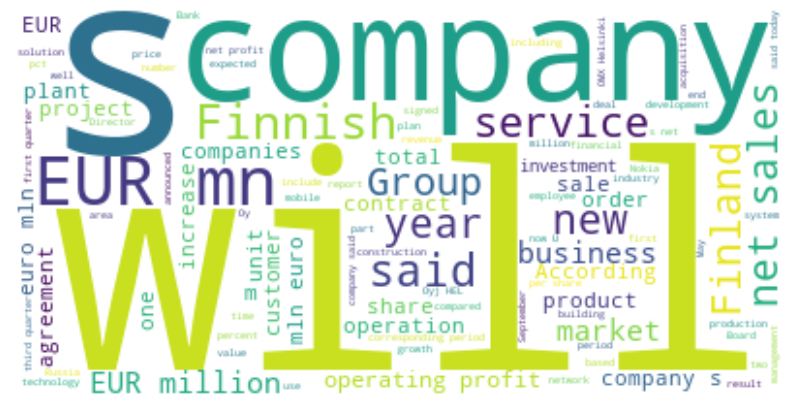

In [41]:
text = " ".join([x for x in df.statement])
wordcloud = WordCloud(background_color="white", max_words=100).generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

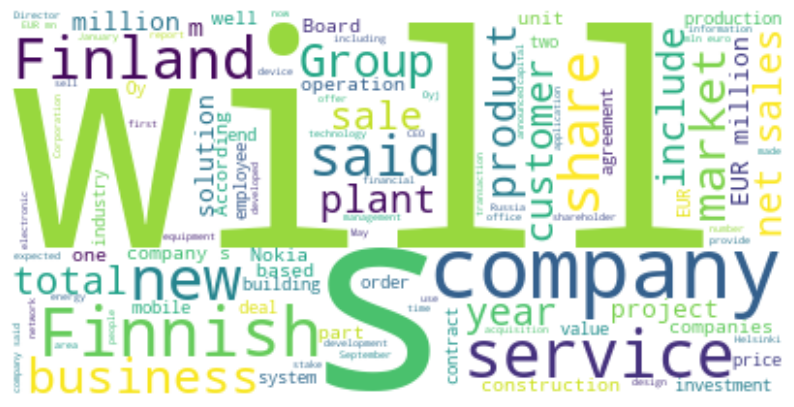

In [42]:
## for neutral

text = " ".join([x for x in df.statement[df.sentiment == 'neutral']])
wordcloud = WordCloud(background_color="white", max_words=100).generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

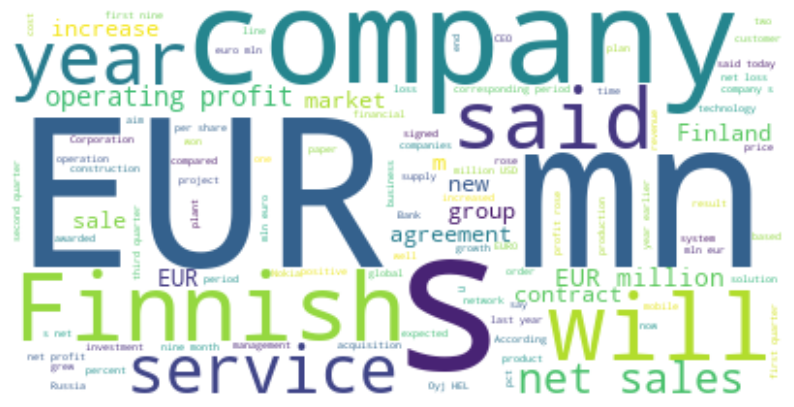

In [43]:
## for positive sentiment

text = " ".join([x for x in df.statement[df.sentiment == 'positive']])
wordcloud = WordCloud(background_color="white", max_words=100).generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

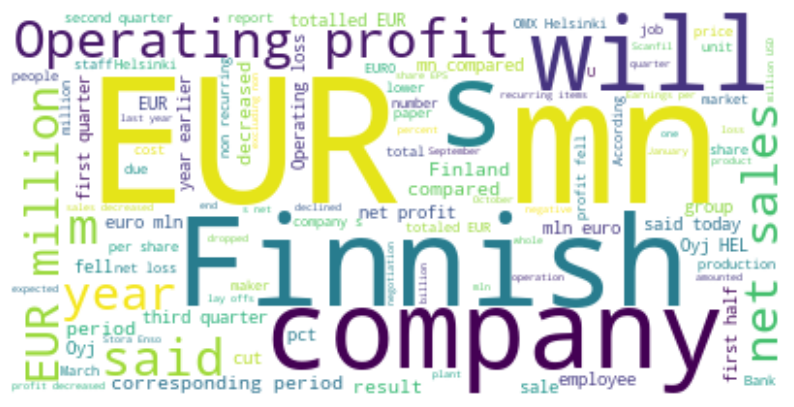

In [44]:
## for negative sentiment

text = " ".join([x for x in df.statement[df.sentiment == 'negative']])
wordcloud = WordCloud(background_color="white", max_words=100).generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [45]:
df['sentiment'].value_counts()

neutral     2871
positive    1362
negative     604
Name: sentiment, dtype: int64